In [1]:
# import base
import tensorflow as tf
import os

2022-11-18 15:14:46.797973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("python version: ", sys.version)
print("tf version: ", tf.__version__)
print("devices: ", tf.config.list_physical_devices())

python version:  3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]
tf version:  2.10.0
devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# load model
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow_hub import KerasLayer
import pandas as pd

model = load_model('model.h5')
model_hist = pd.read_json("hist.json")

2022-11-18 15:14:52.260304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 15:14:52.260848: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-18 15:14:52.260892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 15:14:52.261099: I tensorflow/core/

Metal device set to: AMD Radeon Pro 560X

systemMemory: 32.00 GB
maxCacheSize: 2.00 GB



In [4]:
# pipeline datasets
# create train and validation datasets
batch_size = 128
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/images/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/images/",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

Found 16041 files belonging to 2 classes.
Using 12833 files for training.
Found 16041 files belonging to 2 classes.
Using 3208 files for validation.


In [5]:
# get classes
train_ds.class_names

['car', 'not_car']

In [6]:
# configure for performance
autotune = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

In [7]:
# train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


2022-11-18 15:14:55.568291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - ETA: 0s - loss: 0.1386 - accuracy: 0.9489

2022-11-18 15:15:51.240753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 63s 609ms/step - loss: 0.1386 - accuracy: 0.9489 - val_loss: 0.1409 - val_accuracy: 0.9489
Epoch 2/10
101/101 [==============================] - 53s 526ms/step - loss: 0.1146 - accuracy: 0.9587 - val_loss: 0.1393 - val_accuracy: 0.9479
Epoch 3/10
101/101 [==============================] - 53s 526ms/step - loss: 0.1114 - accuracy: 0.9578 - val_loss: 0.1607 - val_accuracy: 0.9380
Epoch 4/10
101/101 [==============================] - 53s 527ms/step - loss: 0.0930 - accuracy: 0.9656 - val_loss: 0.1484 - val_accuracy: 0.9470
Epoch 5/10
101/101 [==============================] - 53s 527ms/step - loss: 0.0900 - accuracy: 0.9658 - val_loss: 0.1421 - val_accuracy: 0.9483
Epoch 6/10
101/101 [==============================] - 59s 586ms/step - loss: 0.0712 - accuracy: 0.9756 - val_loss: 0.2464 - val_accuracy: 0.9152
Epoch 7/10
101/101 [==============================] - 58s 580ms/step - loss: 0.0508 - accuracy: 0.9813 - val_loss: 0.2325 - val_accuracy: 0.9

In [8]:
# save model
import pandas as pd

model.save('model.h5')
hist_df = pd.DataFrame(history.history)
with open("hist.json", "w") as f:
    hist_df.to_json(f)


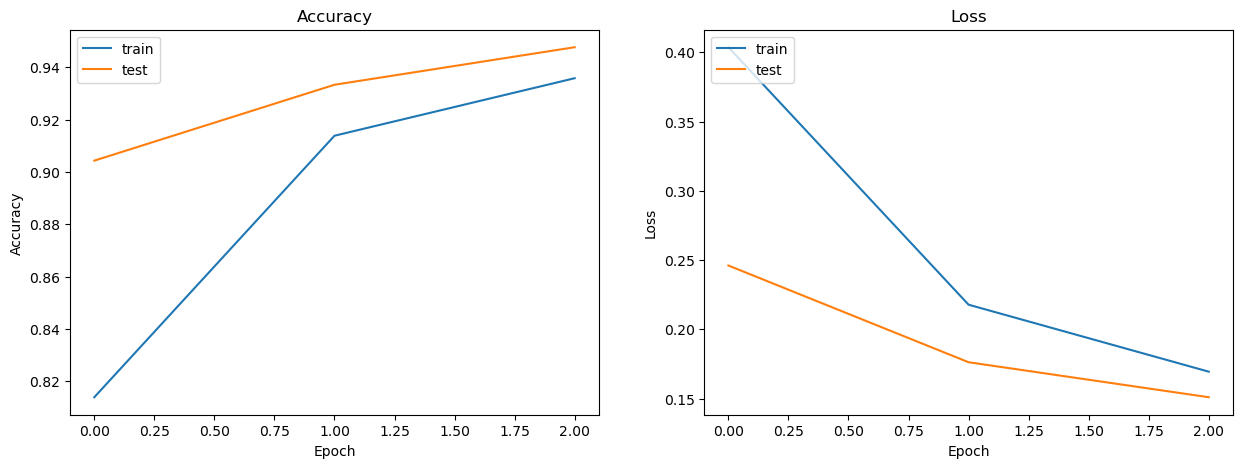

In [9]:
# visualize model
#plot accuracy and val_accuracy
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_title("Accuracy")
axes[0].plot(model_hist['accuracy'], label='train')
axes[0].plot(model_hist['val_accuracy'], label = 'test')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')
# plot loss and val_loss
axes[1].set_title("Loss")
axes[1].plot(model_hist['loss'], label='train')
axes[1].plot(model_hist['val_loss'], label = 'test')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

plt.show()